In [1]:
import os
import numpy as np
import cv2
import glob
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

out_dir='output_images/stage0/'
# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
print('image number = ', len(images))

image number =  20


In [2]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

for ny in [5,6]:
    for nx in [6,7,8,9]:

        # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
        objp = np.zeros((ny*nx,3), np.float32)
        objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)


        # Step through the list and search for chessboard corners
        for idx, fname in enumerate(images):
            img = cv2.imread(fname)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

            # If found, add object points, image points
            if ret == True:
                objpoints.append(objp)
                imgpoints.append(corners)


                # Draw and display the corners
                cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
                image_name=os.path.split(fname)[1]
                write_name = out_dir+'corners_found_ny'+str(ny)+'_nx'+str(nx)+'_'+image_name
                cv2.imwrite(write_name, img)
                print(fname)
#                 cv2.imshow('img', img)
                cv2.waitKey(500)
    cv2.destroyAllWindows()

camera_cal/calibration4.jpg
camera_cal/calibration7.jpg
camera_cal/calibration11.jpg
camera_cal/calibration15.jpg
camera_cal/calibration5.jpg
camera_cal/calibration1.jpg
camera_cal/calibration16.jpg
camera_cal/calibration15.jpg
camera_cal/calibration5.jpg
camera_cal/calibration14.jpg
camera_cal/calibration2.jpg
camera_cal/calibration9.jpg
camera_cal/calibration16.jpg
camera_cal/calibration17.jpg
camera_cal/calibration20.jpg
camera_cal/calibration10.jpg
camera_cal/calibration7.jpg
camera_cal/calibration13.jpg
camera_cal/calibration12.jpg
camera_cal/calibration11.jpg
camera_cal/calibration8.jpg
camera_cal/calibration18.jpg
camera_cal/calibration19.jpg
camera_cal/calibration15.jpg
camera_cal/calibration14.jpg
camera_cal/calibration3.jpg
camera_cal/calibration2.jpg
camera_cal/calibration6.jpg


Text(0.5,1,'Undistorted Image')

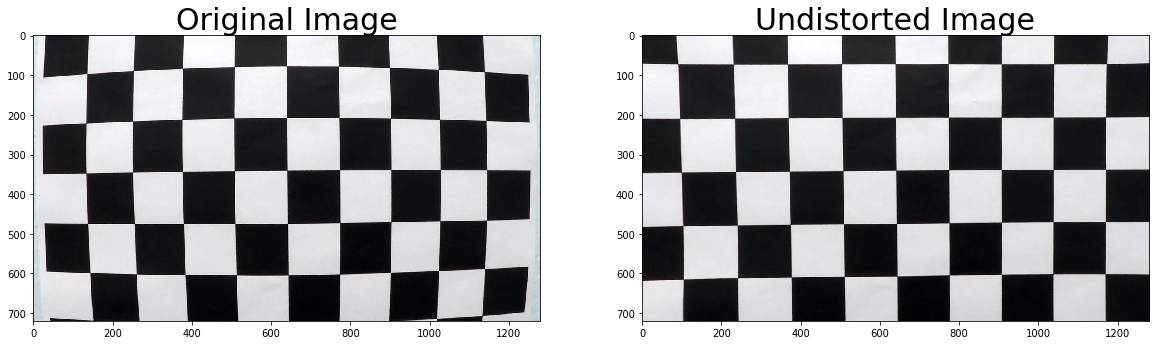

In [3]:
# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [4]:
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_dist_pickle.p", "wb" ) )

In [5]:
# Visualize undistortion
# Step through the list and search for chessboard corners
# load pickled distortion matrix

with open('camera_dist_pickle.p', mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
# Visualize undistortion on test images

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    image_name=os.path.split(fname)[1]
    write_name = out_dir+'undistorted_'+image_name
    cv2.imwrite(write_name,dst)
    print(write_name)
    cv2.imshow('dst', dst)
    cv2.waitKey(500)
cv2.destroyAllWindows()

output_images/stage0/undistorted_calibration9.jpg
output_images/stage0/undistorted_calibration5.jpg
output_images/stage0/undistorted_calibration4.jpg
output_images/stage0/undistorted_calibration1.jpg
output_images/stage0/undistorted_calibration16.jpg
output_images/stage0/undistorted_calibration17.jpg
output_images/stage0/undistorted_calibration20.jpg
output_images/stage0/undistorted_calibration10.jpg
output_images/stage0/undistorted_calibration7.jpg
output_images/stage0/undistorted_calibration13.jpg
output_images/stage0/undistorted_calibration12.jpg
output_images/stage0/undistorted_calibration11.jpg
output_images/stage0/undistorted_calibration8.jpg
output_images/stage0/undistorted_calibration18.jpg
output_images/stage0/undistorted_calibration19.jpg
output_images/stage0/undistorted_calibration15.jpg
output_images/stage0/undistorted_calibration14.jpg
output_images/stage0/undistorted_calibration3.jpg
output_images/stage0/undistorted_calibration2.jpg
output_images/stage0/undistorted_calibr